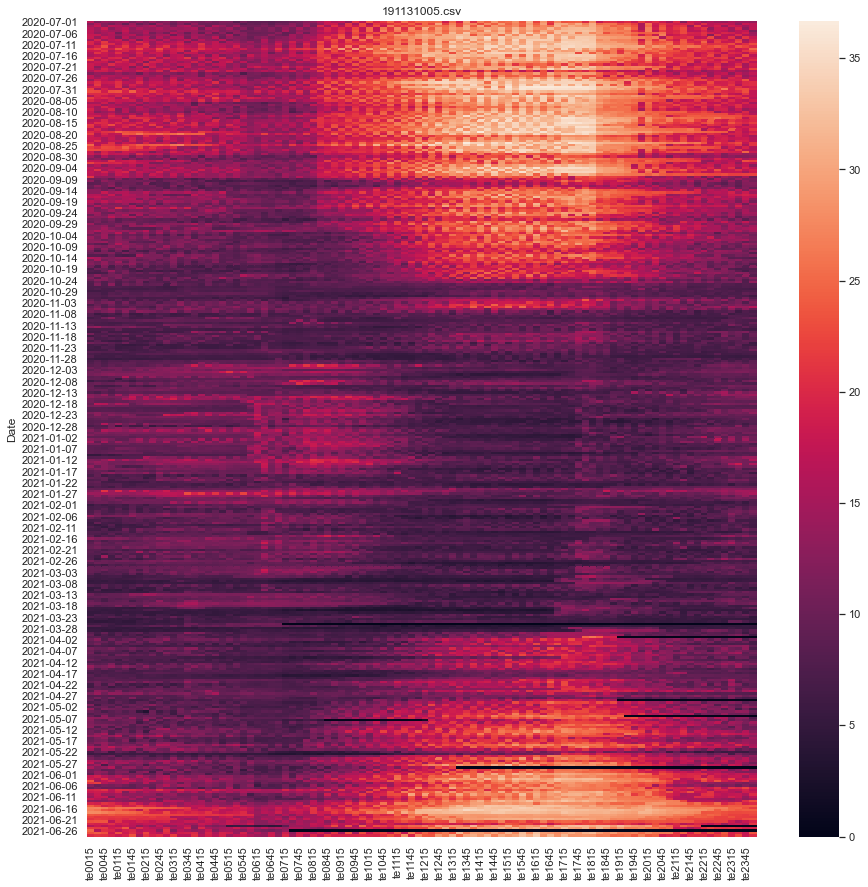

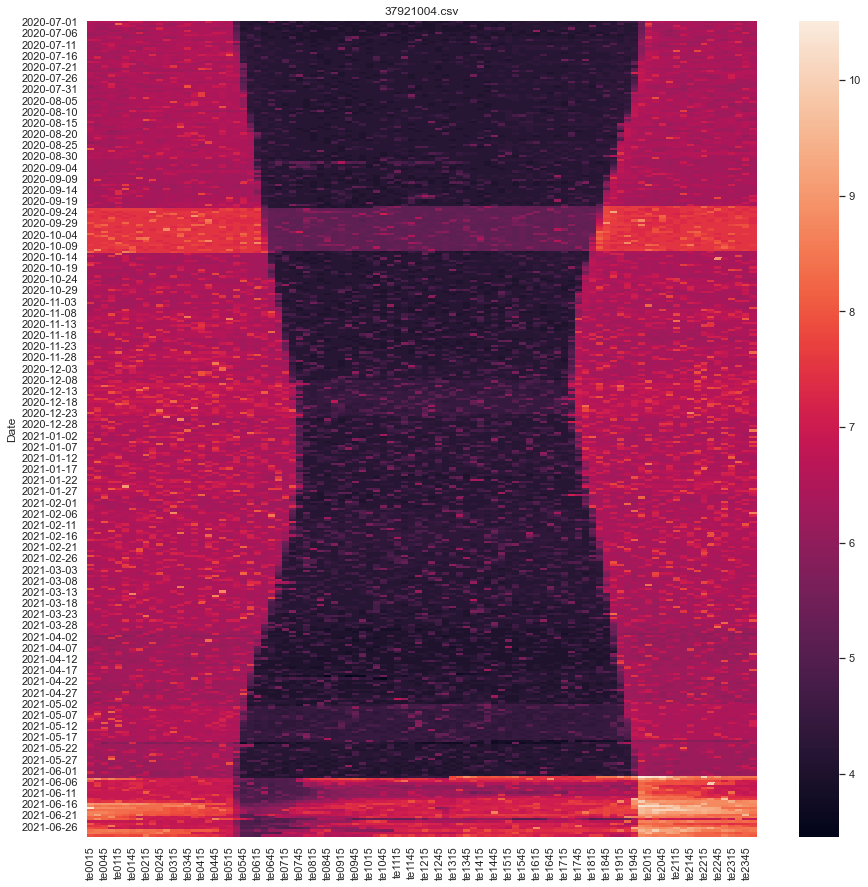

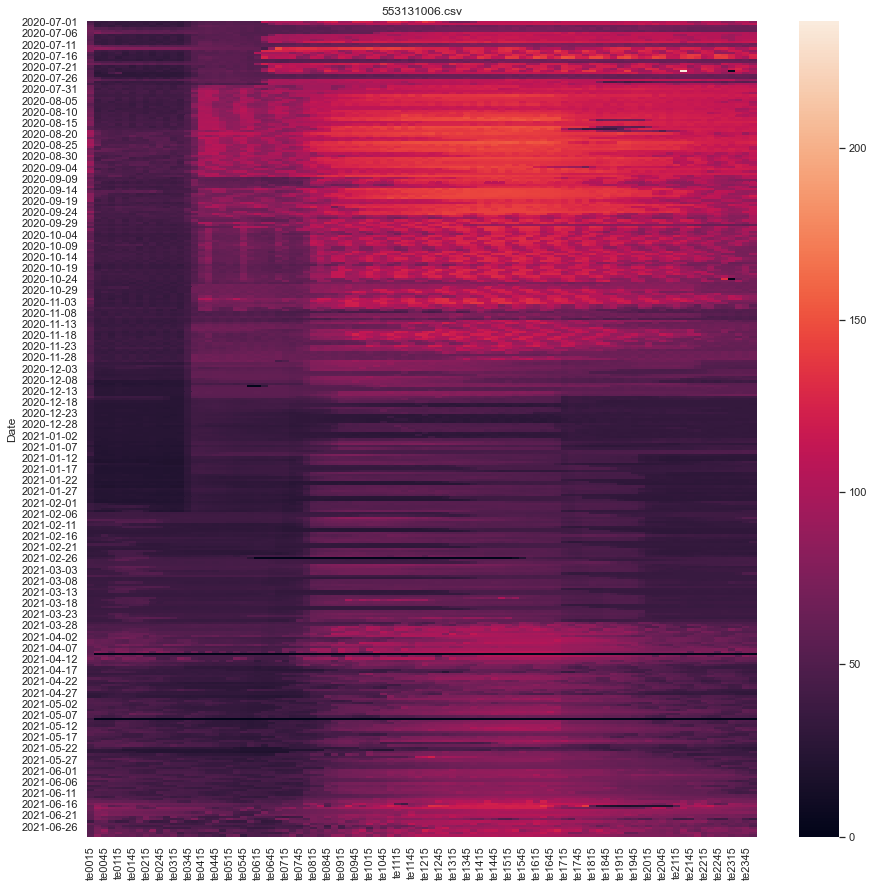

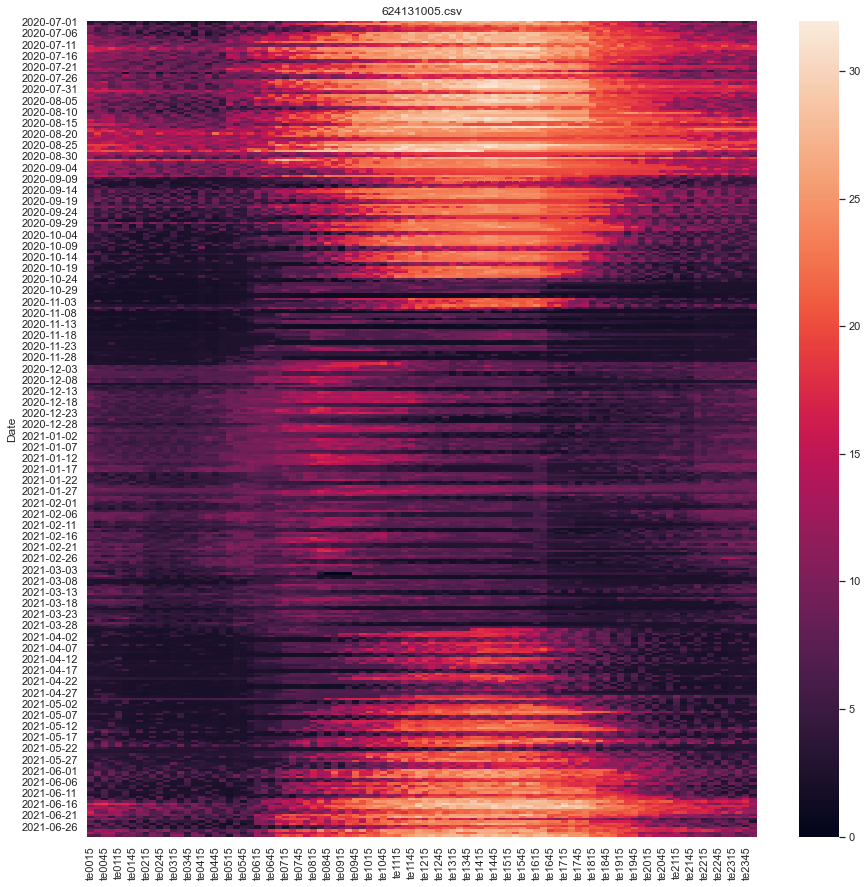

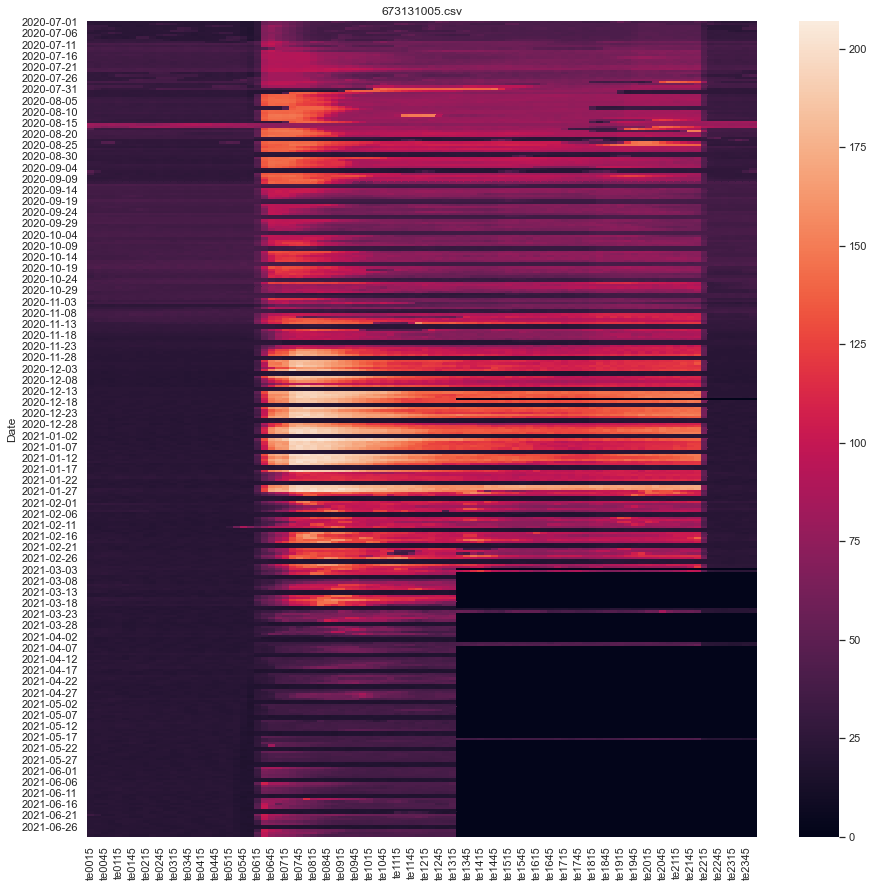

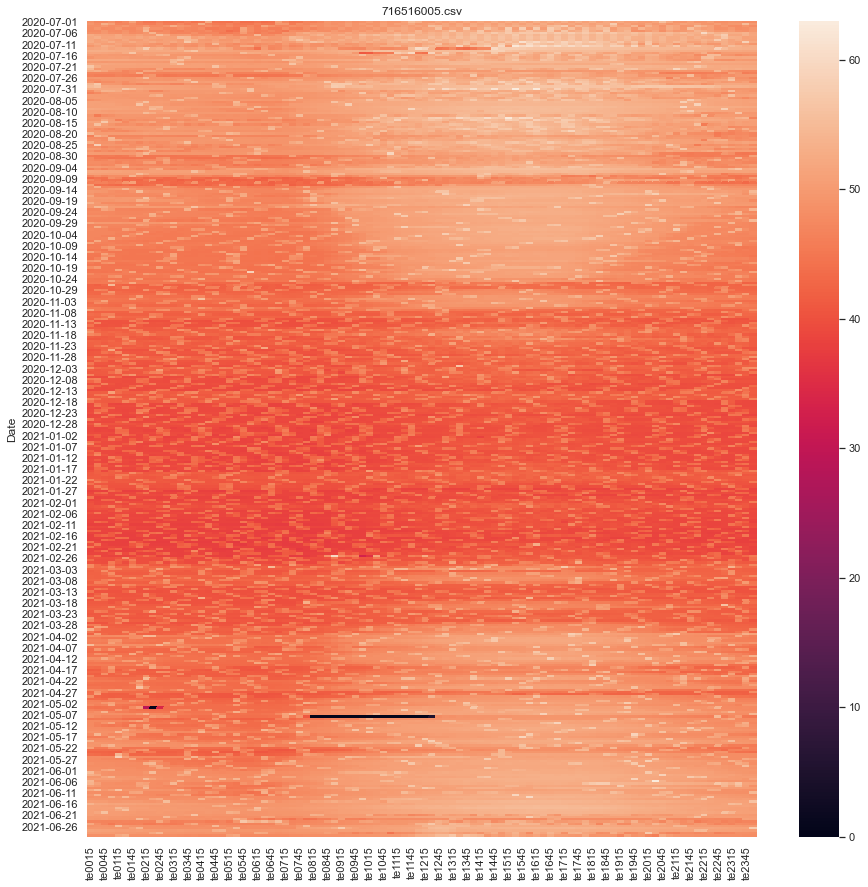

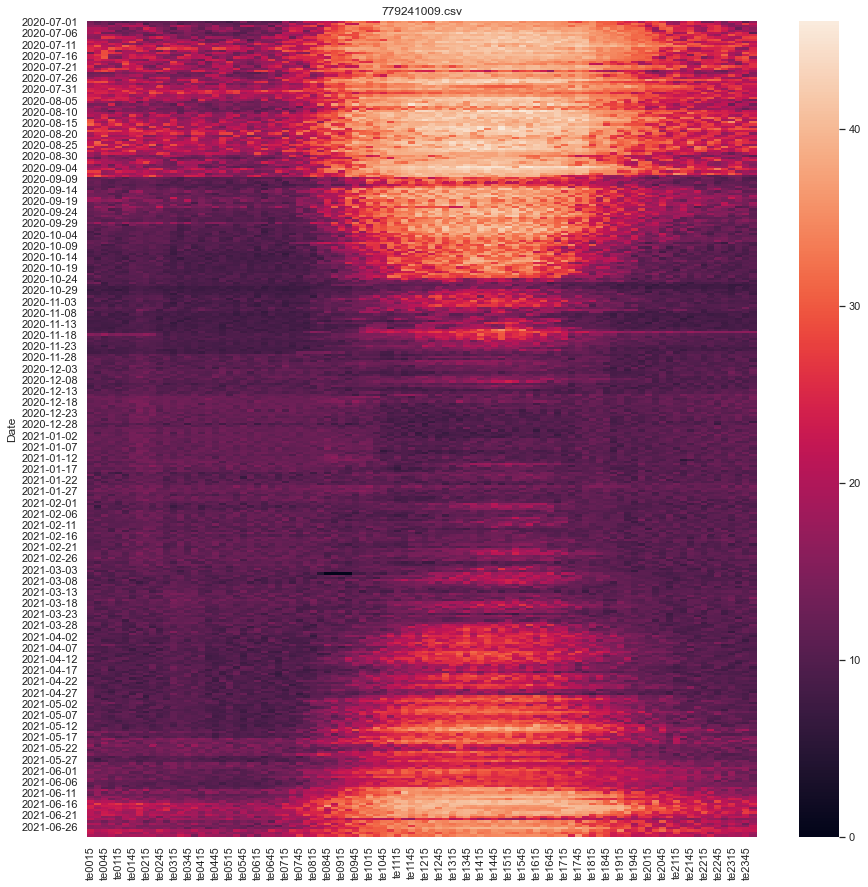

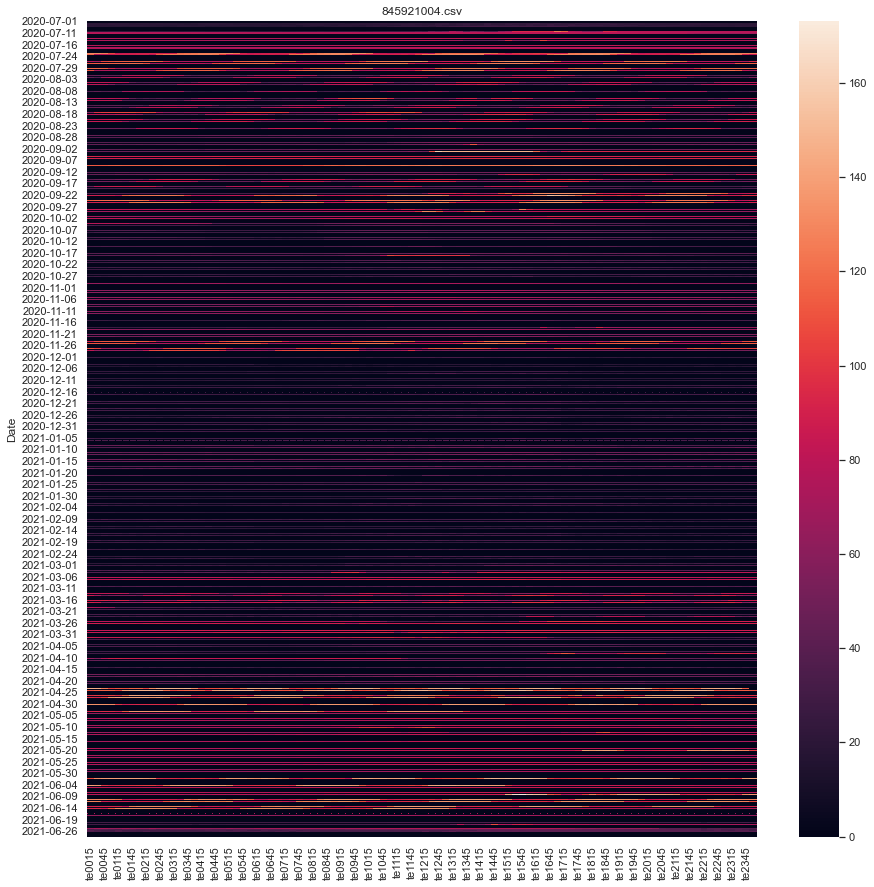

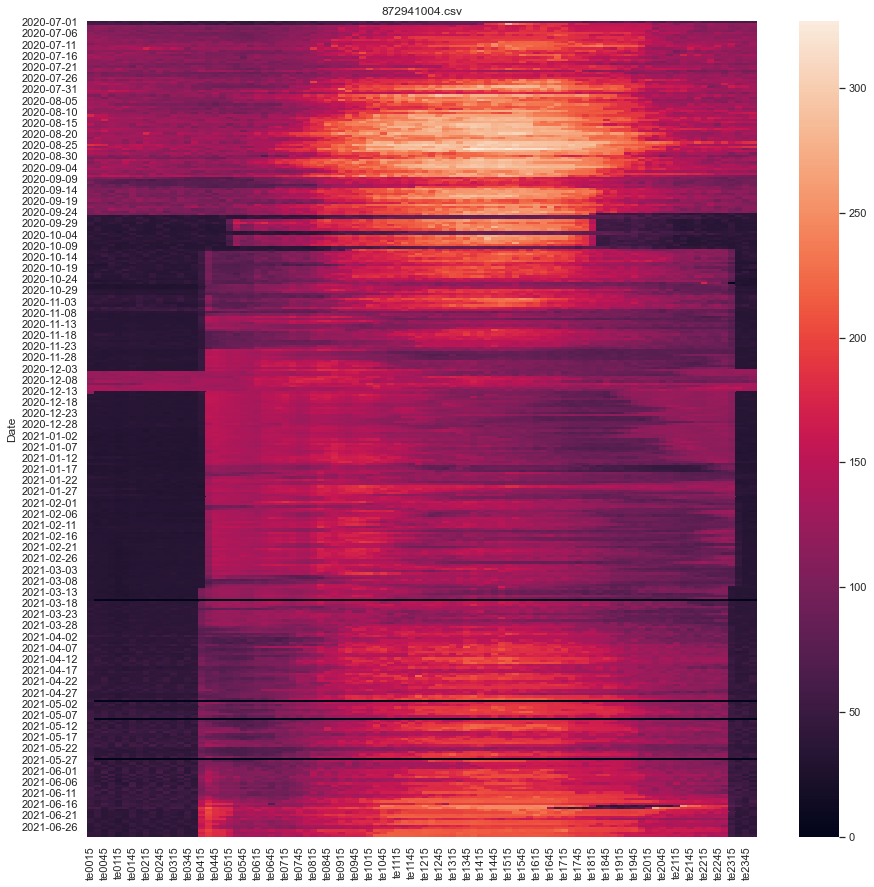

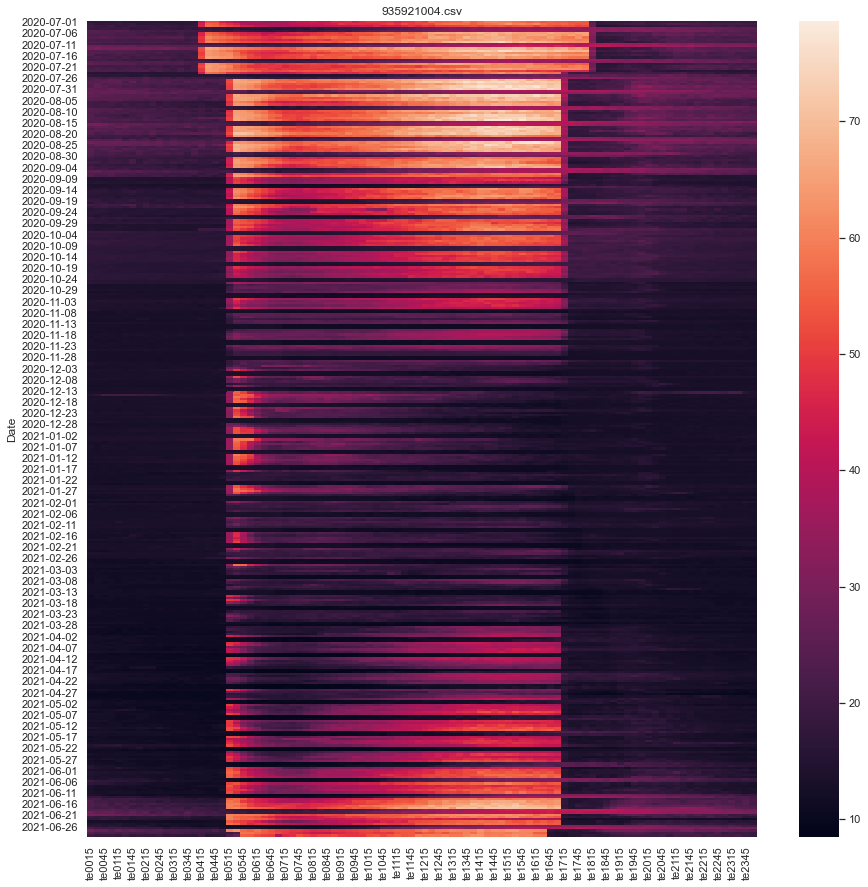

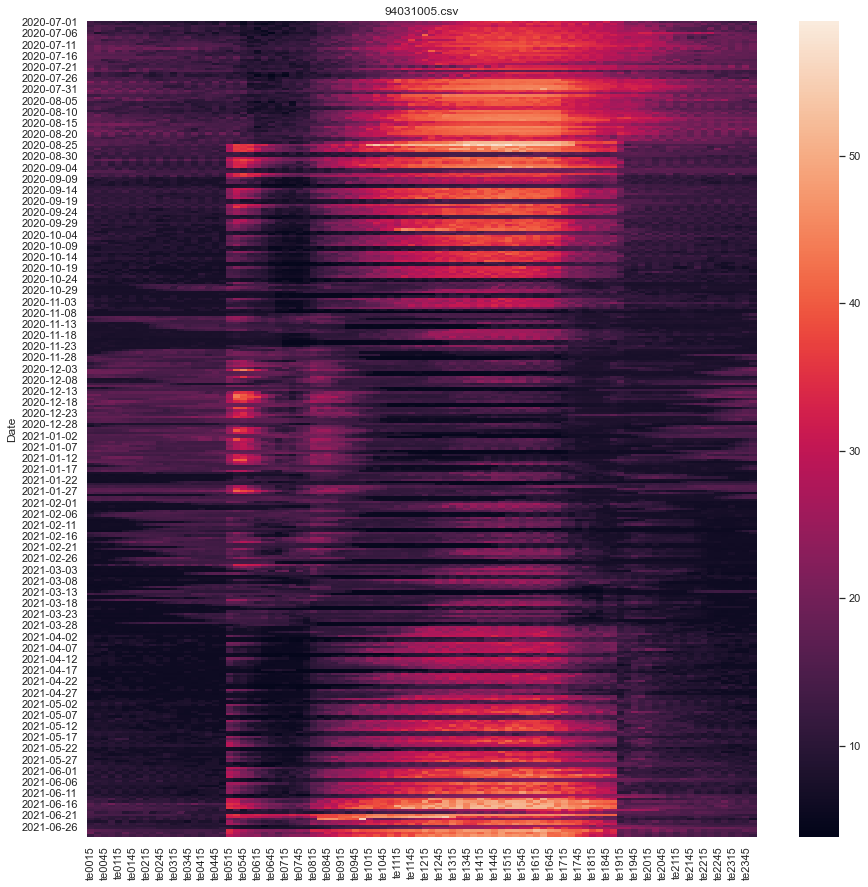

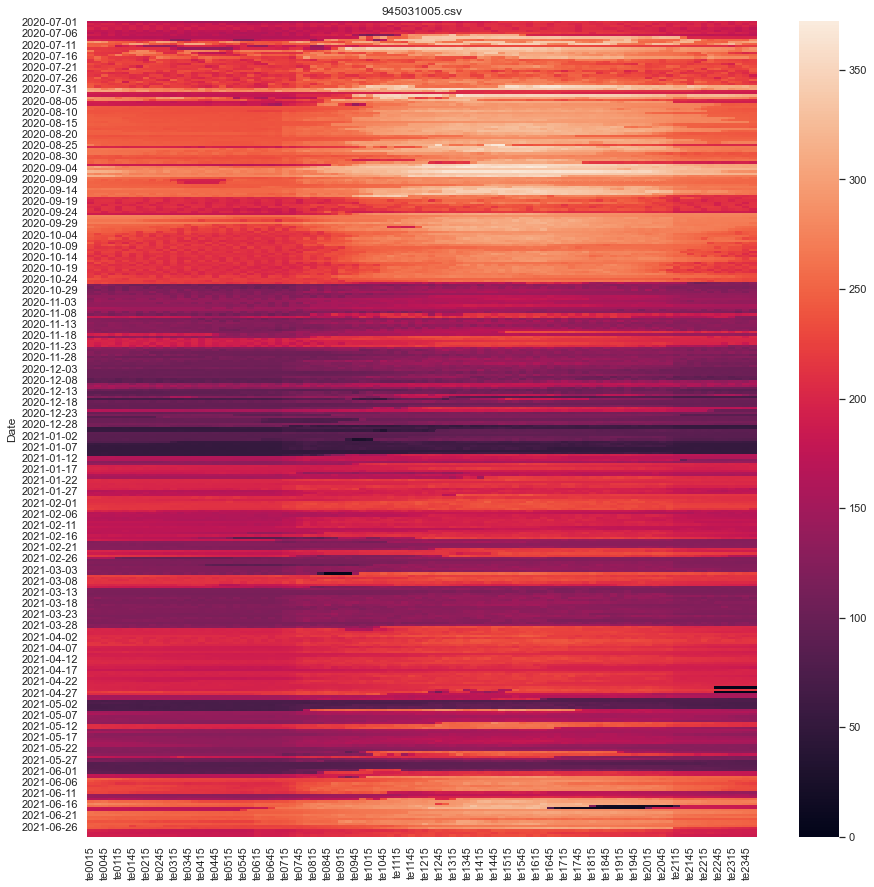

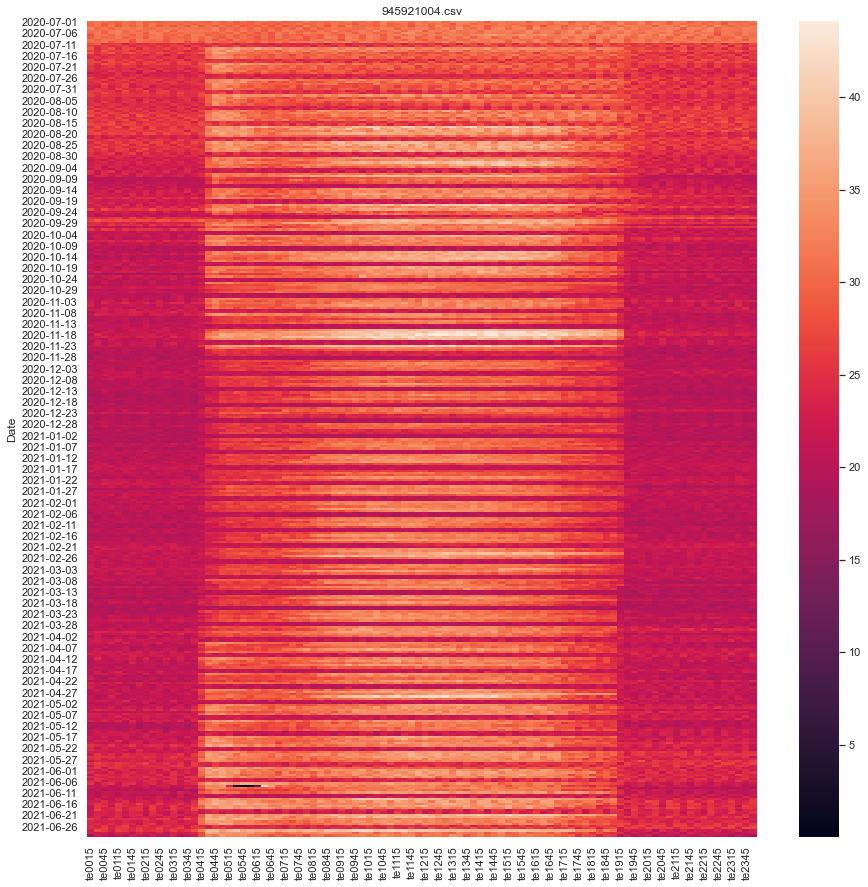

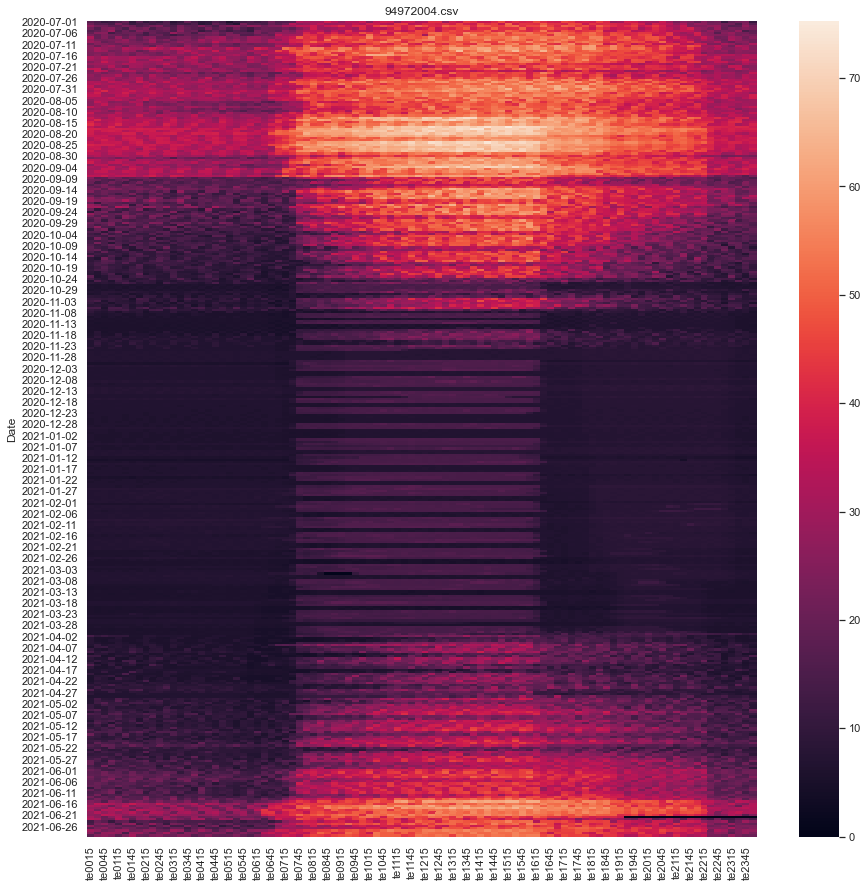

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
sns.set()
import os
# assign directory
directory = 'SRP_IntervalData'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    # checking if it is a file
    if os.path.isfile(f):
        f = pd.read_csv(f, parse_dates = ['dt'])
        f["Date"] = pd.to_datetime(f["dt"]).dt.date
        f = f.drop(columns ={'dt'}, axis =1)
        f = f.set_index('Date')
        pd.DataFrame(f.values, pd.MultiIndex.from_product([['Date'], f.index]),pd.MultiIndex.from_product([['Time'], f.columns]))
        df = f.apply(pd.to_numeric, errors='coerce')
        fig, ax = plt.subplots(figsize=(15,15))   
        ax = sns.heatmap(df)
        ax.set_title(filename)
        plt.savefig(filename, format='png')
        